In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv("HousingData.csv")
df.head()



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [3]:


df.info()
df.isnull().sum()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [4]:


df = df.fillna(df.median())
df.isnull().sum()


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [5]:

X = df.drop("MEDV", axis=1)
y = df["MEDV"]


In [6]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [7]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [8]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [9]:

y_pred = lr.predict(X_test_scaled)


In [10]:
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R²:", r2)
print("RMSE:", rmse)



R²: 0.659101389390351
RMSE: 4.99993847863185


In [11]:

def adjusted_r2(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

n = X_test.shape[0]
p = X_test.shape[1]

adj_r2 = adjusted_r2(r2, n, p)
print("Adjusted R²:", adj_r2)


Adjusted R²: 0.608741367368471


In [12]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score




In [13]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

y_pred_ridge = ridge.predict(X_test_scaled)
ridge_r2 = r2_score(y_test, y_pred_ridge)

print("Ridge R²:", ridge_r2)


Ridge R²: 0.6590559449083202


In [14]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)

y_pred_lasso = lasso.predict(X_test_scaled)
lasso_r2 = r2_score(y_test, y_pred_lasso)

print("Lasso R²:", lasso_r2)


Lasso R²: 0.6440480347733939


In [15]:
print("Linear R²:", r2)
print("Ridge R²:", ridge_r2)
print("Lasso R²:", lasso_r2)


Linear R²: 0.659101389390351
Ridge R²: 0.6590559449083202
Lasso R²: 0.6440480347733939


In [16]:
adj_r2_ridge = adjusted_r2(ridge_r2, n, p)
adj_r2_lasso = adjusted_r2(lasso_r2, n, p)

print("Ridge Adjusted R²:", adj_r2_ridge)
print("Lasso Adjusted R²:", adj_r2_lasso)


Ridge Adjusted R²: 0.6086892094970493
Lasso Adjusted R²: 0.5914642217285544


In [17]:
feature_names = X.columns
lasso_coeffs = pd.Series(lasso.coef_, index=feature_names)

lasso_coeffs[lasso_coeffs != 0]


CRIM      -0.733178
ZN         0.260523
INDUS     -0.252015
CHAS       0.810478
NOX       -1.489955
RM         3.471875
AGE       -0.289681
DIS       -2.390743
RAD        0.390434
TAX       -0.223949
PTRATIO   -1.836817
B          0.997147
LSTAT     -3.127344
dtype: float64

In [18]:
coefficients = pd.Series(lr.coef_, index=X.columns)
coefficients.sort_values()


DIS       -3.206119
LSTAT     -3.090931
PTRATIO   -1.981109
NOX       -1.878393
TAX       -1.502738
CRIM      -0.993472
AGE       -0.496382
INDUS     -0.171919
ZN         0.648245
CHAS       0.832908
B          1.100450
RAD        1.872101
RM         3.342439
dtype: float64

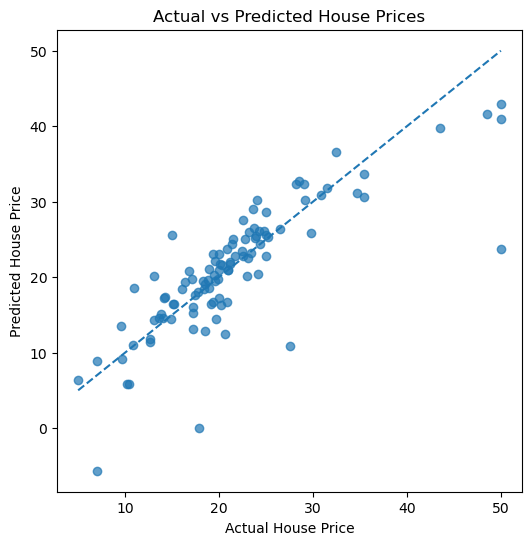

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linestyle='--')
plt.xlabel("Actual House Price")
plt.ylabel("Predicted House Price")
plt.title("Actual vs Predicted House Prices")
plt.show()


In [20]:
import pickle
import os

print("Saving in:", os.getcwd())

with open("linear_model.pkl", "wb") as f:
    pickle.dump(lr, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("Files saved successfully")



Saving in: C:\Users\Admin\House Price Prediction
Files saved successfully


In [21]:
import os
print(os.getcwd())



C:\Users\Admin\House Price Prediction


In [22]:
import pickle
import os

SAVE_PATH = r"C:\Users\Admin\OneDrive\Documents\House Price Prediction"

with open(os.path.join(SAVE_PATH, "linear_model.pkl"), "wb") as f:
    pickle.dump(lr, f)

with open(os.path.join(SAVE_PATH, "scaler.pkl"), "wb") as f:
    pickle.dump(scaler, f)

print("Saved successfully to:", SAVE_PATH)


Saved successfully to: C:\Users\Admin\OneDrive\Documents\House Price Prediction


In [23]:
from sklearn.linear_model import Ridge, Lasso

ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

lasso = Lasso(alpha=0.01)
lasso.fit(X_train_scaled, y_train)


,alpha,0.01
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [24]:
import pickle
import os

SAVE_PATH = r"C:\Users\Admin\OneDrive\Documents\House Price Prediction"

with open(os.path.join(SAVE_PATH, "ridge_model.pkl"), "wb") as f:
    pickle.dump(ridge, f)

with open(os.path.join(SAVE_PATH, "lasso_model.pkl"), "wb") as f:
    pickle.dump(lasso, f)

print("Ridge & Lasso models saved")


Ridge & Lasso models saved
